In [4]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch
import ipywidgets as widgets

#input file
df = pd.read_csv('Footballdata/Others/Napoli/Napoli.csv', encoding='latin-1', low_memory=False)

#Adjust for pitch size
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8
df['blockedX'] = df['blockedX']*1.2
df['blockedY'] = df['blockedY']*.8

#List of Shots
list1 = ['Goal','MissedShots','SavedShot','ShotOnPost']

#Filter for relevant actions only
df = df[df['type_displayName'].isin(list1)]

#Combo box, choose team
options = df["teamId"].unique()
options = options.tolist()

options = [x for x in options if str(x) != 'nan']
teamlist = widgets.Combobox(
    placeholder='Enter a team',
    options=options,
    description='Team:',
    ensure_option=True,
    disabled=False
)
teamlist

Combobox(value='', description='Team:', ensure_option=True, options=('Napoli', '76', '269', '73', '79', '77', …

In [5]:
team = teamlist.value

#Filter for team
df1 = df.loc[(df['teamId']== team)]

SoT = df1.loc[(df1['type_displayName']== "SavedShot") | (df1['type_displayName']== "ShotOnPost")]
Miss = df1.loc[df1['type_displayName']== "MissedShots"]
Goal = df1.loc[df1['type_displayName']== "Goal"]

#Retrieve Opposition team
oppo = df.loc[(df['teamId']!= team)]
oppo = oppo['teamId'].unique()
oppo = oppo[0]

#Shot List
shot_list = df1.groupby(['playername','Kit Number','teamId']).size().reset_index().rename(columns={0:'Shots'}).sort_values('Shots', ascending = False).reset_index()
del shot_list['index']
shot_list.rename(columns = {'teamId':'Team', 'playername':'Player'},inplace = True)
shot_list.index += 1
shot_list['Kit Number'] = shot_list['Kit Number'].astype(int)

#List for annotation of numbers
df1 = df1[['playername','Kit Number','type_displayName','x','y']].reset_index(drop=True)
df1.rename(columns = {'Kit Number':'Num'},inplace = True)
df1['Num'] = df1['Num'].astype(int)
df1.index += 1

#Count number of shots
totalshots = df1.x.count()
totalshots=str(totalshots)

shot_list

Player  Kit Number    Team  Shots
1                Victor Osimhen           9  Napoli    118
2         Khvicha Kvaratskhelia          77  Napoli     79
3               Piotr Zielinski          20  Napoli     46
4                Hirving Lozano          11  Napoli     42
5   AndrÃ©-Frank Zambo Anguissa          99  Napoli     39
6             Giacomo Raspadori          81  Napoli     34
7               Matteo Politano          21  Napoli     31
8                   Eljif Elmas           7  Napoli     28
9           Giovanni Di Lorenzo          22  Napoli     28
10                Amir Rrahmani          13  Napoli     20
11            Tanguy NdombÃ©lÃ©          91  Napoli     16
12            Stanislav Lobotka          68  Napoli     11
13             Giovanni Simeone          18  Napoli     10
14                   MÃ¡rio Rui           6  Napoli     10
15                  Kim Min-Jae           3  Napoli      8
16             MathÃ­as Olivera          17  Napoli      8
17                   Juan Jesus           5  Napoli      5
18             Gianluca Gaetano          70  Napoli      3
19               Leo ÃstigÃ¥rd          55  Napoli      2
20            Alessandro Zanoli          59  Napoli      1
21               Alessio Zerbin          23  Napoli      1
22                   Adam Ounas          33  Napoli      1

# Team Shots

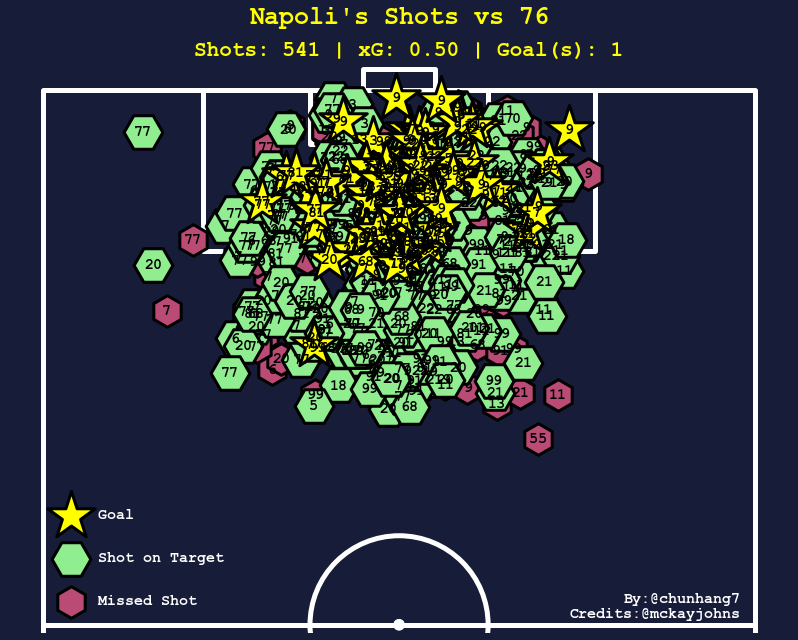

In [6]:
pitch = VerticalPitch(pad_bottom=0.9,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      pitch_type='statsbomb', 
                      pitch_color='#171c38', 
                      line_color='white',
                      linewidth=5, 
                      spot_scale=0.005)

fig, ax = pitch.draw(figsize=(13, 9))
fig.set_facecolor('#171c38')

plt.gca().invert_xaxis()


#plot the shot locations

#Goals
pitch.scatter(Goal.x, Goal.y, s=2500, c='yellow', edgecolors='black', 
              zorder=3, linewidth = 3, marker='*', ax=ax, label = ' Goal')
#Shots on Target
pitch.scatter(SoT.x, SoT.y, s=1500, c='lightgreen', edgecolors='black', 
              zorder=2, linewidth = 3, marker='H', ax=ax, label = ' Shot on Target')
#Miss
pitch.scatter(Miss.x, Miss.y, s=1000, c='#b94b75', edgecolors='black', 
              zorder=1, linewidth = 3, marker='h', ax=ax, label = ' Missed Shot')


plt.title(team+"'s Shots vs "+oppo+'\n',color='yellow',size=25, fontfamily = "Courier New", fontweight = "bold")

ax.text(63,124, 'Shots: ' + totalshots +' | xG: 0.50 | Goal(s): 1', fontsize=21, 
        color='yellow',fontweight = "bold",fontfamily = "Courier New")


#Kit Numbers on Nodes
for index, row in df1.iterrows():
    pitch.annotate(row.Num, xy=(row.x,row.y), c='black', va='center', ha='center', 
                   size=15, fontweight='bold', fontfamily="Courier New",ax=ax)
    

# setup the legend
legend = ax.legend(loc='center left', bbox_to_anchor=(0.057, 0.13),facecolor='#171c38', edgecolor='None',
                   labelspacing=3)

for text in legend.get_texts():
    text.set_fontsize(15)
    text.set_fontfamily("Courier New")
    text.set_fontweight("bold")
    text.set_color('white')


#credits
fig.text(.865,.04,'By:@chunhang7\nCredits:@mckayjohns',fontsize=15,fontfamily='Courier New',
       ha='right',color='w',fontweight='bold')

plt.show()

# Player Shots

In [7]:
#List it in a combo box
options = shot_list["Player"].unique()
options = options.tolist()

options = [x for x in options if str(x) != 'nan']
playerlist = widgets.Combobox(
    placeholder='Enter a name',
    options=options,
    description='Player:',
    ensure_option=True,
    disabled=False
)
playerlist

Combobox(value='', description='Player:', ensure_option=True, options=('Victor Osimhen', 'Khvicha Kvaratskheli…

In [8]:
#Filter for player
player = playerlist.value
#df2 = df.loc[(df['playername']== player)]

df2 = df.loc[(df['teamId']== team)]

Miss = df2.loc[(df2['type_displayName']== "SavedShot") | (df2['type_displayName']== "ShotOnPost") | (df2['type_displayName']== "MissedShots")]
#Miss = df2.loc[df2['type_displayName']== "MissedShots"]
Goal = df2.loc[df2['type_displayName']== "Goal"]

GoalCount = Goal.x.count()
GoalCount = str(GoalCount)

MissCount = Miss.x.count()
MissCount = str(MissCount)

In [9]:
#Set up pitch
mpl.rcParams['figure.dpi'] = 500
pitch = VerticalPitch(pitch_type='statsbomb', 
                  pitch_color='#000000', line_color='white',half = True,
                  line_zorder=1, linewidth=8, spot_scale=0.003)

fig,ax = pitch.draw(figsize=(30, 20), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#000000')

#Inverse the y-axis
plt.gca().invert_xaxis()

#Plot points
pitch.scatter(Miss.x, Miss.y, marker='o', s=1000, c='red', linewidth = 4, ax=ax, edgecolor='yellow', alpha=0.4)
pitch.scatter(Goal.x, Goal.y, marker='o', s=3000, c='#00c631', linewidth = 5, ax=ax, edgecolor='yellow',alpha=0.9)

#Title & Annotations
fig.suptitle("\n\n"+team+"'s Shot Map\nPremier League | 2023\n\n", fontsize=65, color='yellow',
            fontfamily = "Courier New", fontweight = "bold",y=0.94)

highlight_textprops =\
    [{"color": "#00c631","fontweight": 'bold'},
     {"color": "red","fontweight": 'bold'}]

Title = fig_text(s = "Expected Goals: " + '20.9' + " | <Goals:> " + GoalCount + " | <Missed:> " + MissCount ,
        x = 0.5, y = 0.75, highlight_textprops = highlight_textprops ,color='white',
        fontfamily = "Courier New",fontweight='bold', ha='center',fontsize=45)

ax.text(-4, 70, 'space', va='center', ha='left', fontsize=25, color='black',
        fontweight = "bold",fontfamily = "Courier New")

ax.text(89, 70, 'space', va='center', ha='left', fontsize=25, color='black',
        fontweight = "bold",fontfamily = "Courier New")

plt.show()

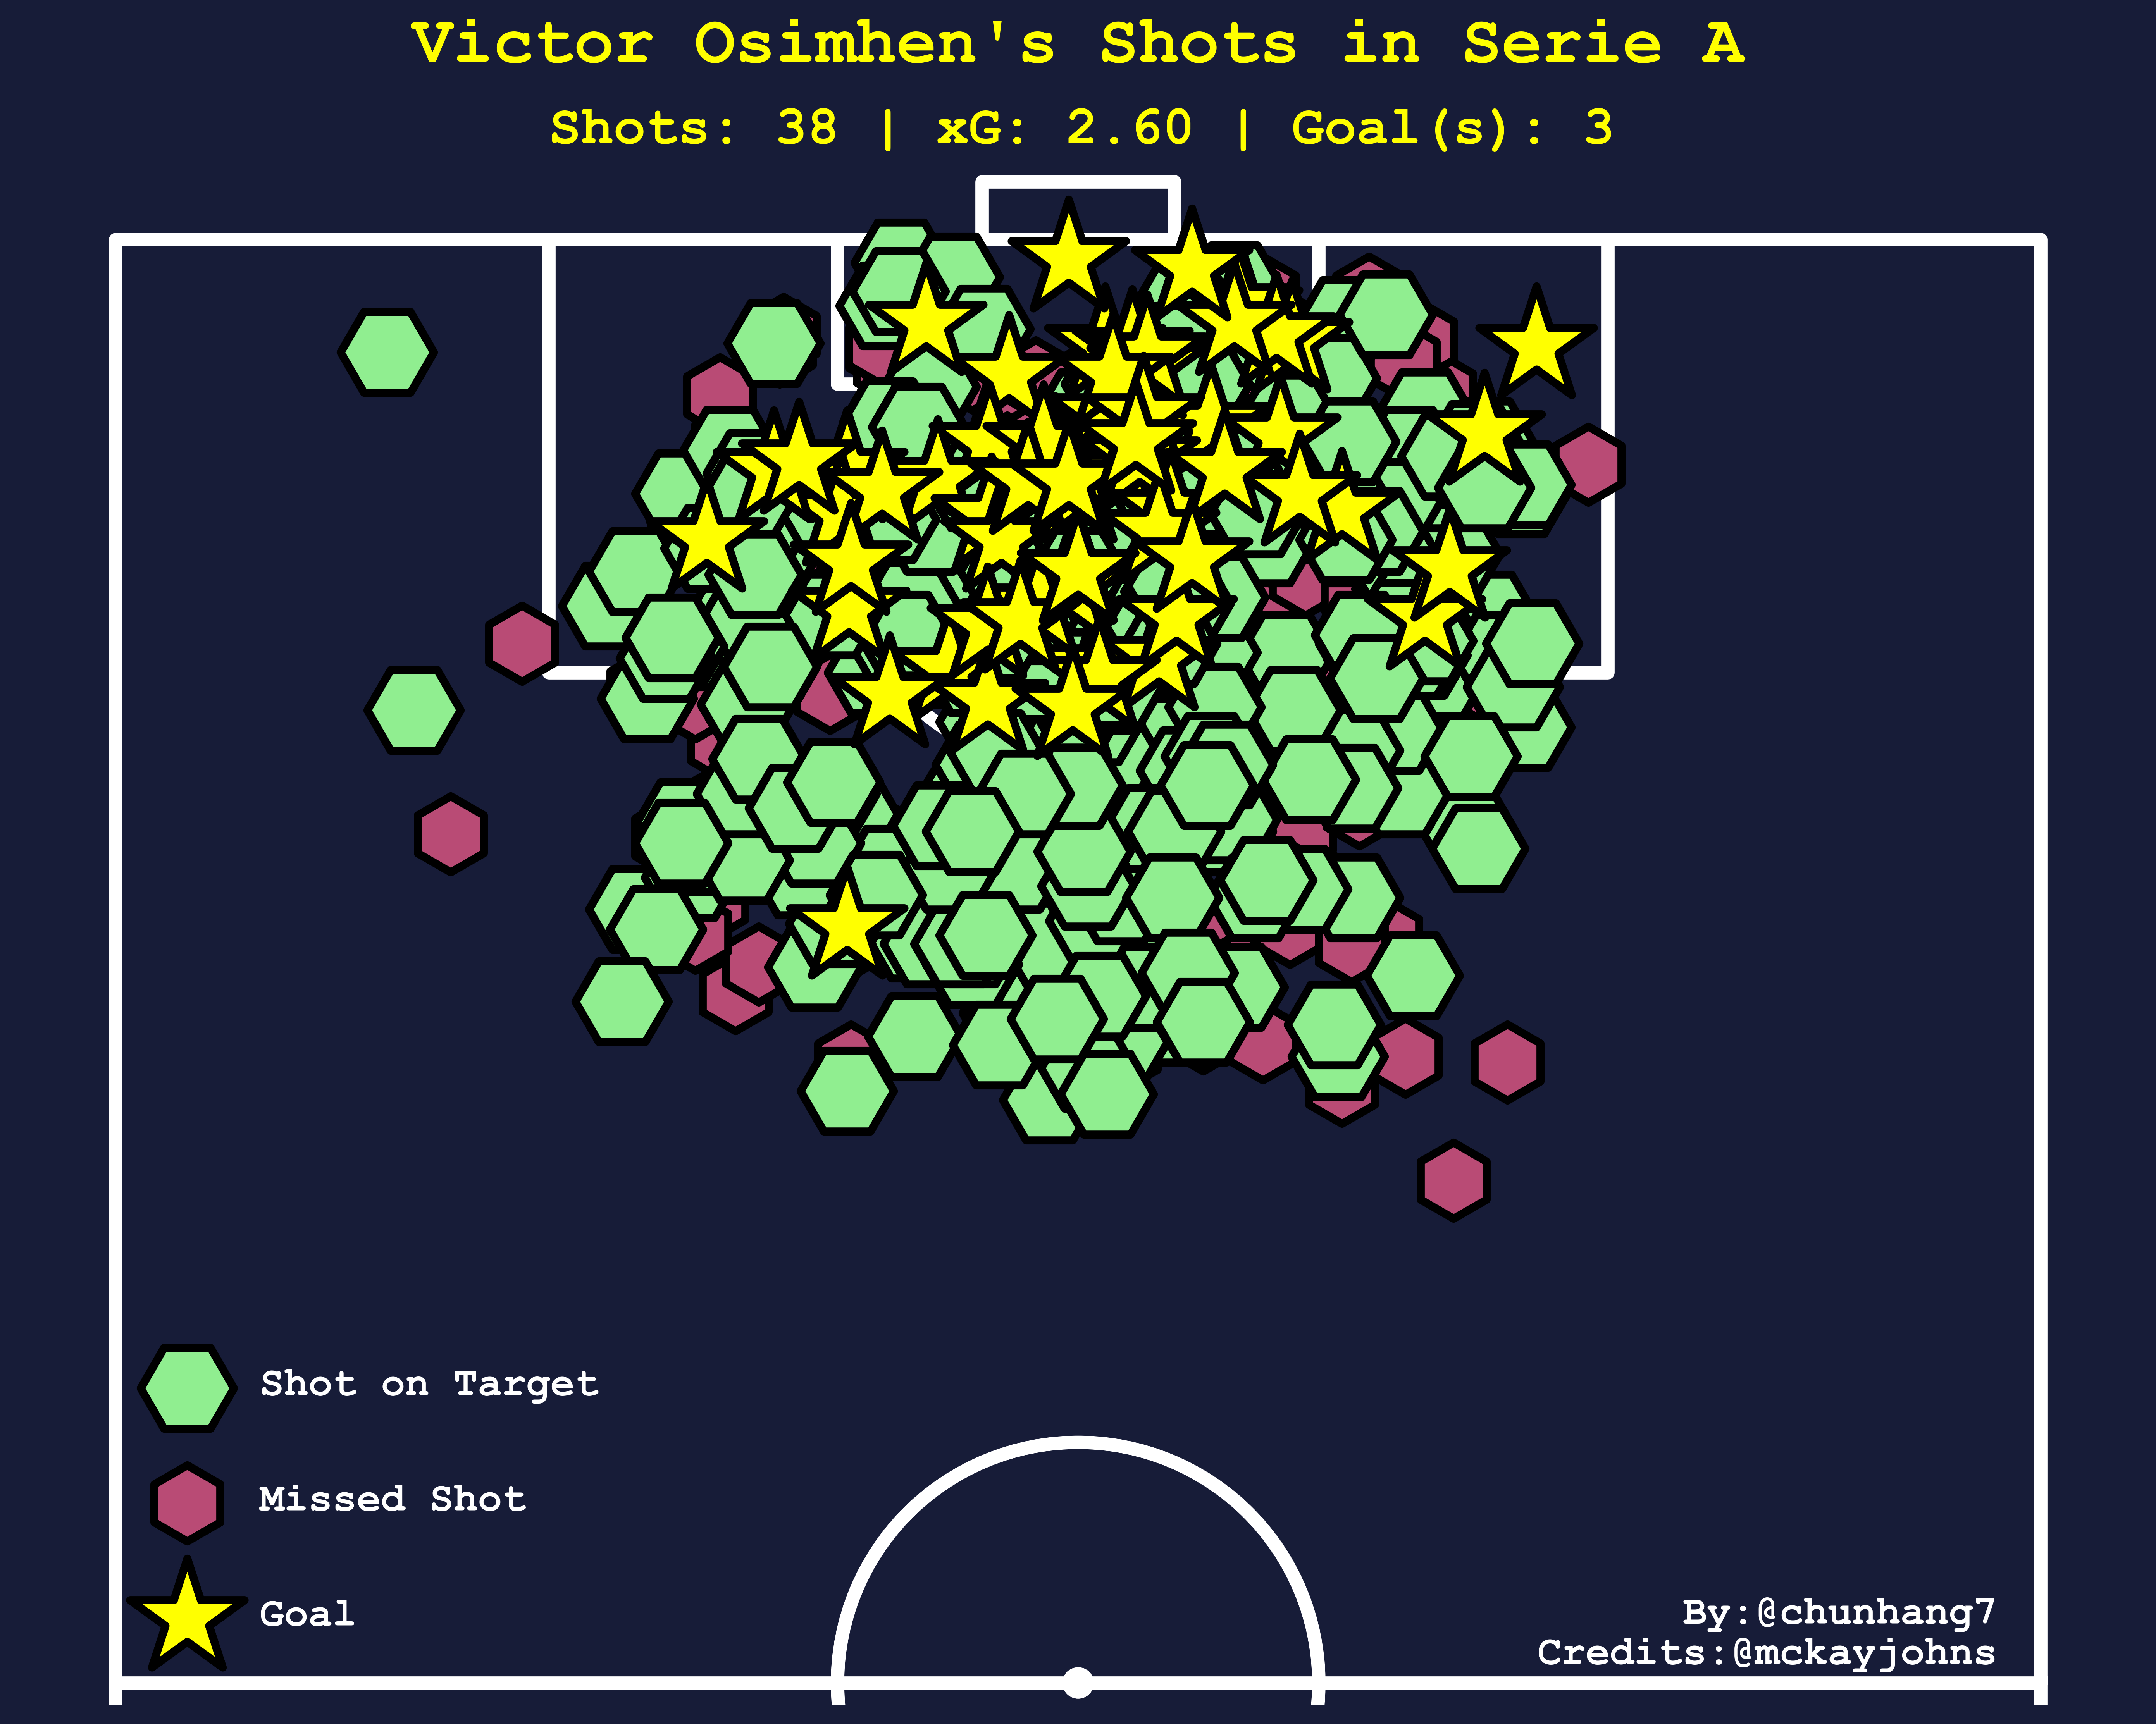

In [10]:
pitch = VerticalPitch(pad_bottom=0.9,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      pitch_type='statsbomb', 
                      pitch_color='#171c38', 
                      line_color='white',
                      linewidth=5, 
                      spot_scale=0.005)

fig, ax = pitch.draw(figsize=(13, 9))
fig.set_facecolor('#171c38')

plt.gca().invert_xaxis()


#plot the shot locations

#Shots on Target
pitch.scatter(SoT.x, SoT.y, s=1200, c='lightgreen', edgecolors='black', 
              zorder=2, linewidth = 3, marker='H', ax=ax, label = ' Shot on Target')
#Miss
pitch.scatter(Miss.x, Miss.y, s=800, c='#b94b75', edgecolors='black', 
              zorder=1, linewidth = 3, marker='h', ax=ax, label = ' Missed Shot')
#Goals
pitch.scatter(Goal.x, Goal.y, s=2000, c='yellow', edgecolors='black', 
              zorder=3, linewidth = 3, marker='*', ax=ax, label = ' Goal')

#plt.title(player + "'s Shots vs"+" "+oppo+"\n",color='yellow',size=25, fontfamily = "Courier New", fontweight = "bold")
plt.title(player + "'s Shots in Serie A"+"\n",color='yellow',size=25, fontfamily = "Courier New", fontweight = "bold")

ax.text(62,124, 'Shots: 38 | xG: 2.60 | Goal(s): 3', fontsize=20, 
        color='yellow',fontweight = "bold",fontfamily = "Courier New")


# setup the legend
legend = ax.legend(loc='center left', bbox_to_anchor=(0.055, 0.13),facecolor='#171c38', edgecolor='None',
                   labelspacing=3)

for text in legend.get_texts():
    text.set_fontsize(15)
    text.set_fontfamily("Courier New")
    text.set_fontweight("bold")
    text.set_color('white')


#credits
fig.text(.865,.04,'By:@chunhang7\nCredits:@mckayjohns',fontsize=15,fontfamily='Courier New',
       ha='right',color='w',fontweight='bold')

plt.show()

In [11]:
#Saved Shots from opposition keeper
df2 = df.loc[(df['playername'].shift(-1) =="David de Gea") & 
              (df['type/displayName'] == 'SavedShot')]

#Blocked Shots from (home/away) team
df3 = df.loc [ (df['teamId'] == team) &
               (df['type/displayName'] == 'SavedShot')]
#df3

KeyError: 'type/displayName'

In [ ]:
pitch = VerticalPitch(pad_bottom=0.9,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      pitch_type='statsbomb', 
                      pitch_color='#0a6c71', 
                      line_color='white',
                      linewidth=5, 
                      spot_scale=0.005)

fig, ax = pitch.draw(figsize=(13, 9))
fig.set_facecolor('#0a6c71')

plt.gca().invert_xaxis()


#plot the shot locations

#Blocked Shots
pitch.lines(df3.x,df3.y,df3.blockedX,df3.blockedY,comet=True,ax=ax,
           linewidth=10, capstyle='butt', 
           alpha=0.7, color ='yellow', label = 'Blocked Shots')

#Saved Shots
pitch.lines(df2.x,df2.y,df2.blockedX,df2.blockedY,comet=True,ax=ax,
           linewidth=10, capstyle='round', 
           alpha=0.6, color ='lightgreen', label = 'Saved Shots')


plt.title(team+"'s Shots on Target\nvs "+oppo,color='yellow',size=35, fontfamily = "Courier New", fontweight = "bold")


# setup the legend
legend = ax.legend(loc='center left', bbox_to_anchor=(0.05, 0.06),facecolor='#0a6c71', edgecolor='None',
                   labelspacing=1)

for text in legend.get_texts():
    text.set_fontsize(18)
    text.set_fontfamily("Courier New")
    text.set_fontweight("bold")
    text.set_color('white')

#credits
fig.text(.865,.04,'By:@chunhang7\nCredits:@mckayjohns',fontsize=15,fontfamily='Courier New',
       ha='right',color='w',fontweight='bold');

# Understat Data

In [94]:
#input file
df = pd.read_csv('understat.csv')

df = df[['x','y','xG', 'result']]

#Adjust to pitch size
df['x'] = df['x']*120
df['y'] = df['y']*80

#Filter for Goals and Misses
Goal = df.loc[df['result'] == "Goal"]
Miss = df.loc[df['result'] != "Goal"]

df.head(5)

#Sum
Totalxg = df.xG.sum()
Totalxg = round(Totalxg,2)
Totalxg = str(Totalxg)

GoalCount = Goal.x.count()
GoalCount = str(GoalCount)

MissCount = Miss.x.count()
MissCount = str(MissCount)

In [95]:
#Set up pitch
mpl.rcParams['figure.dpi'] = 500
pitch = VerticalPitch(pitch_type='statsbomb', 
                  pitch_color='#000000', line_color='white',half = True,
                  line_zorder=1, linewidth=8, spot_scale=0.003)

fig,ax = pitch.draw(figsize=(30, 20), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#000000')

#Inverse the y-axis
plt.gca().invert_xaxis()

#Plot points
pitch.scatter(Miss.x, Miss.y, marker='o', s=Miss.xG*7000, c='red', linewidth = 3, ax=ax, edgecolor='yellow')
pitch.scatter(Goal.x, Goal.y, marker='o', s=Goal.xG*7000, c='lightgreen', linewidth = 3, ax=ax, edgecolor='yellow')

#Title & Annotations
fig.suptitle("\n\nNeymar's Shot Map in 2021/22\n\n", fontsize=60, color='yellow',
            fontfamily = "Courier New", fontweight = "bold",y=0.97)

highlight_textprops =\
    [{"color": "lightgreen","fontweight": 'bold'},
     {"color": "red","fontweight": 'bold'}]

Title = fig_text(s = "Expected Goals: " + Totalxg + " | <Goals:> " + GoalCount + " | <Missed:> " + MissCount ,
        x = 0.5, y = 0.8, highlight_textprops = highlight_textprops ,color='white',
        fontfamily = "Courier New",fontweight='bold', ha='center',fontsize=45)

ax.text(-4, 70, 'space', va='center', ha='left', fontsize=25, color='black',
        fontweight = "bold",fontfamily = "Courier New")

ax.text(89, 70, 'space', va='center', ha='left', fontsize=25, color='black',
        fontweight = "bold",fontfamily = "Courier New")

plt.show()